# Bloomberg Project

Introduction:

Bloomberg ranking the 5,000 largest firms based on their market capitalization at current prices. The dataset included indicators describing the firms and the monthly opening stock prices from December 2019 to November 2020. This specific timeframe was selected to analyze the impact of the COVID-19 pandemic on the value of these companies.

The upcoming project is designed for both investors and the general public, aiming to shed light on the companies and economic sectors that thrived or suffered during the pandemic.The primary motivation behind this analysis is to communicate which sectors emerged as winners and losers during this period. Additionaly the project seeks to determine if there is a correlation between market capitalization and a firm's size throughout the pandemic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Bloomberg-dataset.csv')

# Exploring Dataset

In [3]:
df.shape

(4937, 26)

In [4]:
df.head(10)

,Ticker,Short Name,Market Cap,Rank(Current Market Cap),Sector,Prim Exch Nm,Country,Cntry of Incorp,Best Analyst Rating,52Wk High,...,3/2/2020,2/3/2020,1/4/2020,1/5/2020,1/6/2020,1/7/2020,3/8/2020,1/9/2020,1/10/2020,2/11/2020
0,AAPL US Equity,APPLE INC,2.045320e+12,1,Technology,NASDAQ GS,UNITED STATES,US,4.116279,137.98,...,77.17,74.70,60.23,72.27,80.46,91.03,108.94,134.18,116.79,108.77
1,ARAMCO AB Equity,SAUDI ARABIAN OI,1.887800e+12,2,Energy,Saudi Arabia,SAUDI ARABIA,SA,2.777778,10.32,...,9.05,8.74,8.13,8.42,8.76,8.72,8.80,9.40,9.53,9.12
2,MSFT US Equity,MICROSOFT CORP,1.642370e+12,3,Technology,NASDAQ GS,UNITED STATES,US,4.789474,232.86,...,174.38,172.79,152.11,174.57,182.83,204.70,216.54,227.27,212.46,202.33
3,AMZN US Equity,AMAZON.COM INC,1.571010e+12,4,Communications,NASDAQ GS,UNITED STATES,US,4.892857,3552.25,...,2004.20,1953.95,1907.70,2286.04,2471.04,2878.70,3111.89,3499.12,3221.26,3004.48
4,GOOGL US Equity,ALPHABET INC-A,1.202590e+12,5,Communications,NASDAQ GS,UNITED STATES,US,4.772727,1816.89,...,1482.60,1386.32,1102.10,1317.32,1434.87,1442.00,1482.76,1655.08,1487.90,1624.32
5,FB US Equity,FACEBOOK INC-A,7.945600e+11,6,Communications,NASDAQ GS,UNITED STATES,US,4.553571,304.67,...,204.19,196.44,159.60,202.27,231.91,237.55,251.96,295.44,266.63,261.36
6,700 HK Equity,TENCENT,7.381140e+11,7,Communications,Hong Kong,CHINA,KY,4.852459,81.64,...,48.92,50.07,48.29,53.79,55.34,64.33,69.54,69.55,66.00,77.61
7,BABA US Equity,ALIBABA GRP-ADR,6.988930e+11,8,Communications,New York,CHINA,KY,4.938461,319.32,...,213.10,210.98,187.56,194.48,206.57,215.95,257.94,298.00,290.05,310.84
8,BRK/A US Equity,BERKSHIRE HATH-A,5.464850e+11,9,Financial,New York,UNITED STATES,US,4.500000,350000.00,...,334860.00,324500.00,261250.00,273975.00,275600.00,267020.00,298800.00,327440.00,318600.00,306375.00
9,V US Equity,VISA INC-CLASS A,4.678860e+11,10,Financial,New York,UNITED STATES,US,4.605263,217.65,...,200.81,192.33,153.11,175.57,194.35,193.78,190.69,213.35,203.35,184.74


In [5]:
df.columns

Index(['Ticker', 'Short Name', 'Market Cap', 'Rank(Current Market Cap)',
       'Sector', 'Prim Exch Nm', 'Country', 'Cntry of Incorp',
       'Best Analyst Rating', '52Wk High', '52Wk Low', '52Wk Low Dt',
       '52Wk High Dt', '1Y Tot Ret (%)', '2/12/2019', '1/1/2020', '3/2/2020',
       '2/3/2020', '1/4/2020', '1/5/2020', '1/6/2020', '1/7/2020', '3/8/2020',
       '1/9/2020', '1/10/2020', '2/11/2020'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ticker                    4937 non-null   object 
 1   Short Name                4937 non-null   object 
 2   Market Cap                4937 non-null   float64
 3   Rank(Current Market Cap)  4937 non-null   int64  
 4   Sector                    4937 non-null   object 
 5   Prim Exch Nm              4937 non-null   object 
 6   Country                   4937 non-null   object 
 7   Cntry of Incorp           4937 non-null   object 
 8   Best Analyst Rating       4824 non-null   float64
 9   52Wk High                 4937 non-null   float64
 10  52Wk Low                  4937 non-null   float64
 11  52Wk Low Dt               4937 non-null   object 
 12  52Wk High Dt              4937 non-null   object 
 13  1Y Tot Ret (%)            4937 non-null   float64
 14  2/12/201

In [7]:
df.describe()

,Market Cap,Rank(Current Market Cap),Best Analyst Rating,52Wk High,52Wk Low,1Y Tot Ret (%),2/12/2019,1/1/2020,3/2/2020,2/3/2020,1/4/2020,1/5/2020,1/6/2020,1/7/2020,3/8/2020,1/9/2020,1/10/2020,2/11/2020
count,4.937000e+03,4937.000000,4824.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,1.912620e+10,2477.893660,3.672289,187.105252,110.744805,26.113857,157.924908,162.346423,162.406332,155.608292,128.955536,137.347008,143.840826,143.171219,153.651491,163.968548,161.347606,157.008469
std,6.586439e+10,1434.490523,1.337234,5176.619658,3546.204029,93.391530,4870.501376,5005.822001,4957.054467,4792.217480,3920.732087,4088.317150,4122.498624,3998.485825,4428.810949,4837.975300,4719.880508,4542.147508
min,2.751337e+09,1.000000,0.000000,0.000000,0.000000,-77.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.071396e+09,1236.000000,3.363636,6.660000,2.830000,-7.190000,3.450000,3.720000,3.650000,3.760000,2.990000,3.430000,3.720000,4.030000,4.400000,4.680000,4.650000,4.680000
50%,6.752808e+09,2474.000000,4.052631,30.870000,13.210000,7.340000,21.600000,22.630000,22.270000,20.950000,15.810000,18.110000,20.120000,21.000000,22.570000,23.700000,23.510000,23.760000
75%,1.494602e+10,3714.000000,4.556666,84.720000,39.020000,34.270000,62.430000,64.190000,64.320000,60.060000,47.480000,53.500000,59.640000,60.430000,63.070000,66.490000,65.830000,66.090000
max,2.045320e+12,4999.000000,5.000000,350000.000000,239440.000000,2547.540000,330609.000000,339590.000000,334860.000000,324500.000000,261250.000000,273975.000000,275600.000000,267020.000000,298800.000000,327440.000000,318600.000000,306375.000000


# Data Cleaning

In [8]:
#finding missing values 
df.isnull().sum()

Ticker                        0
Short Name                    0
Market Cap                    0
Rank(Current Market Cap)      0
Sector                        0
Prim Exch Nm                  0
Country                       0
Cntry of Incorp               0
Best Analyst Rating         113
52Wk High                     0
52Wk Low                      0
52Wk Low Dt                   0
52Wk High Dt                  0
1Y Tot Ret (%)                0
2/12/2019                     0
1/1/2020                      0
3/2/2020                      0
2/3/2020                      0
1/4/2020                      0
1/5/2020                      0
1/6/2020                      0
1/7/2020                      0
3/8/2020                      0
1/9/2020                      0
1/10/2020                     0
2/11/2020                     0
dtype: int64

The column 'Best Analyst Rating' contains 113 missing values. I currently do not intend to work with this column so I leave it.

In [9]:
#finding duplicates
dupl= df[df.duplicated()]
dupl

,Ticker,Short Name,Market Cap,Rank(Current Market Cap),Sector,Prim Exch Nm,Country,Cntry of Incorp,Best Analyst Rating,52Wk High,...,3/2/2020,2/3/2020,1/4/2020,1/5/2020,1/6/2020,1/7/2020,3/8/2020,1/9/2020,1/10/2020,2/11/2020


There are 0 duplicate rows in dataset.

# Exploratory Visual Analysis 

In [10]:
# creating correlation matrix in pandas
cor_matrix = df.corr(numeric_only= True)
cor_matrix

,Market Cap,Rank(Current Market Cap),Best Analyst Rating,52Wk High,52Wk Low,1Y Tot Ret (%),2/12/2019,1/1/2020,3/2/2020,2/3/2020,1/4/2020,1/5/2020,1/6/2020,1/7/2020,3/8/2020,1/9/2020,1/10/2020,2/11/2020
Market Cap,1.000000,-0.329339,0.035215,0.116678,0.114484,0.019853,0.114291,0.114328,0.114222,0.114497,0.113255,0.114638,0.114873,0.115651,0.116528,0.117076,0.116456,0.116339
Rank(Current Market Cap),-0.329339,1.000000,-0.031305,-0.031455,-0.030123,-0.018054,-0.029544,-0.029646,-0.029951,-0.029870,-0.030573,-0.031054,-0.031585,-0.032037,-0.031839,-0.031627,-0.031695,-0.031639
Best Analyst Rating,0.035215,-0.031305,1.000000,0.000587,-0.000198,0.102906,0.000446,0.000495,0.000328,0.000334,-0.000741,-0.000318,-0.000526,-0.000702,0.000174,0.000622,0.000453,0.000287
52Wk High,0.116678,-0.031455,0.000587,1.000000,0.999791,-0.003761,0.999813,0.999853,0.999915,0.999916,0.998682,0.999417,0.999189,0.999075,0.999869,0.999902,0.999882,0.999848
52Wk Low,0.114484,-0.030123,-0.000198,0.999791,1.000000,-0.005561,0.999655,0.999723,0.999879,0.999834,0.999066,0.999643,0.999405,0.999272,0.999881,0.999849,0.999894,0.999883
1Y Tot Ret (%),0.019853,-0.018054,0.102906,-0.003761,-0.005561,1.000000,-0.006267,-0.006153,-0.006057,-0.005824,-0.005647,-0.005379,-0.005081,-0.004722,-0.004014,-0.003729,-0.003764,-0.003782
2/12/2019,0.114291,-0.029544,0.000446,0.999813,0.999655,-0.006267,1.000000,0.999989,0.999829,0.999943,0.997939,0.998890,0.998525,0.998332,0.999571,0.999755,0.999613,0.999559
1/1/2020,0.114328,-0.029646,0.000495,0.999853,0.999723,-0.006153,0.999989,1.000000,0.999871,0.999963,0.998111,0.999021,0.998680,0.998492,0.999659,0.999820,0.999695,0.999646
3/2/2020,0.114222,-0.029951,0.000328,0.999915,0.999879,-0.006057,0.999829,0.999871,1.000000,0.999955,0.998932,0.999567,0.999334,0.999193,0.999844,0.999838,0.999861,0.999843
2/3/2020,0.114497,-0.029870,0.000334,0.999916,0.999834,-0.005824,0.999943,0.999963,0.999955,1.000000,0.998510,0.999297,0.999000,0.998838,0.999778,0.999864,0.999806,0.999767


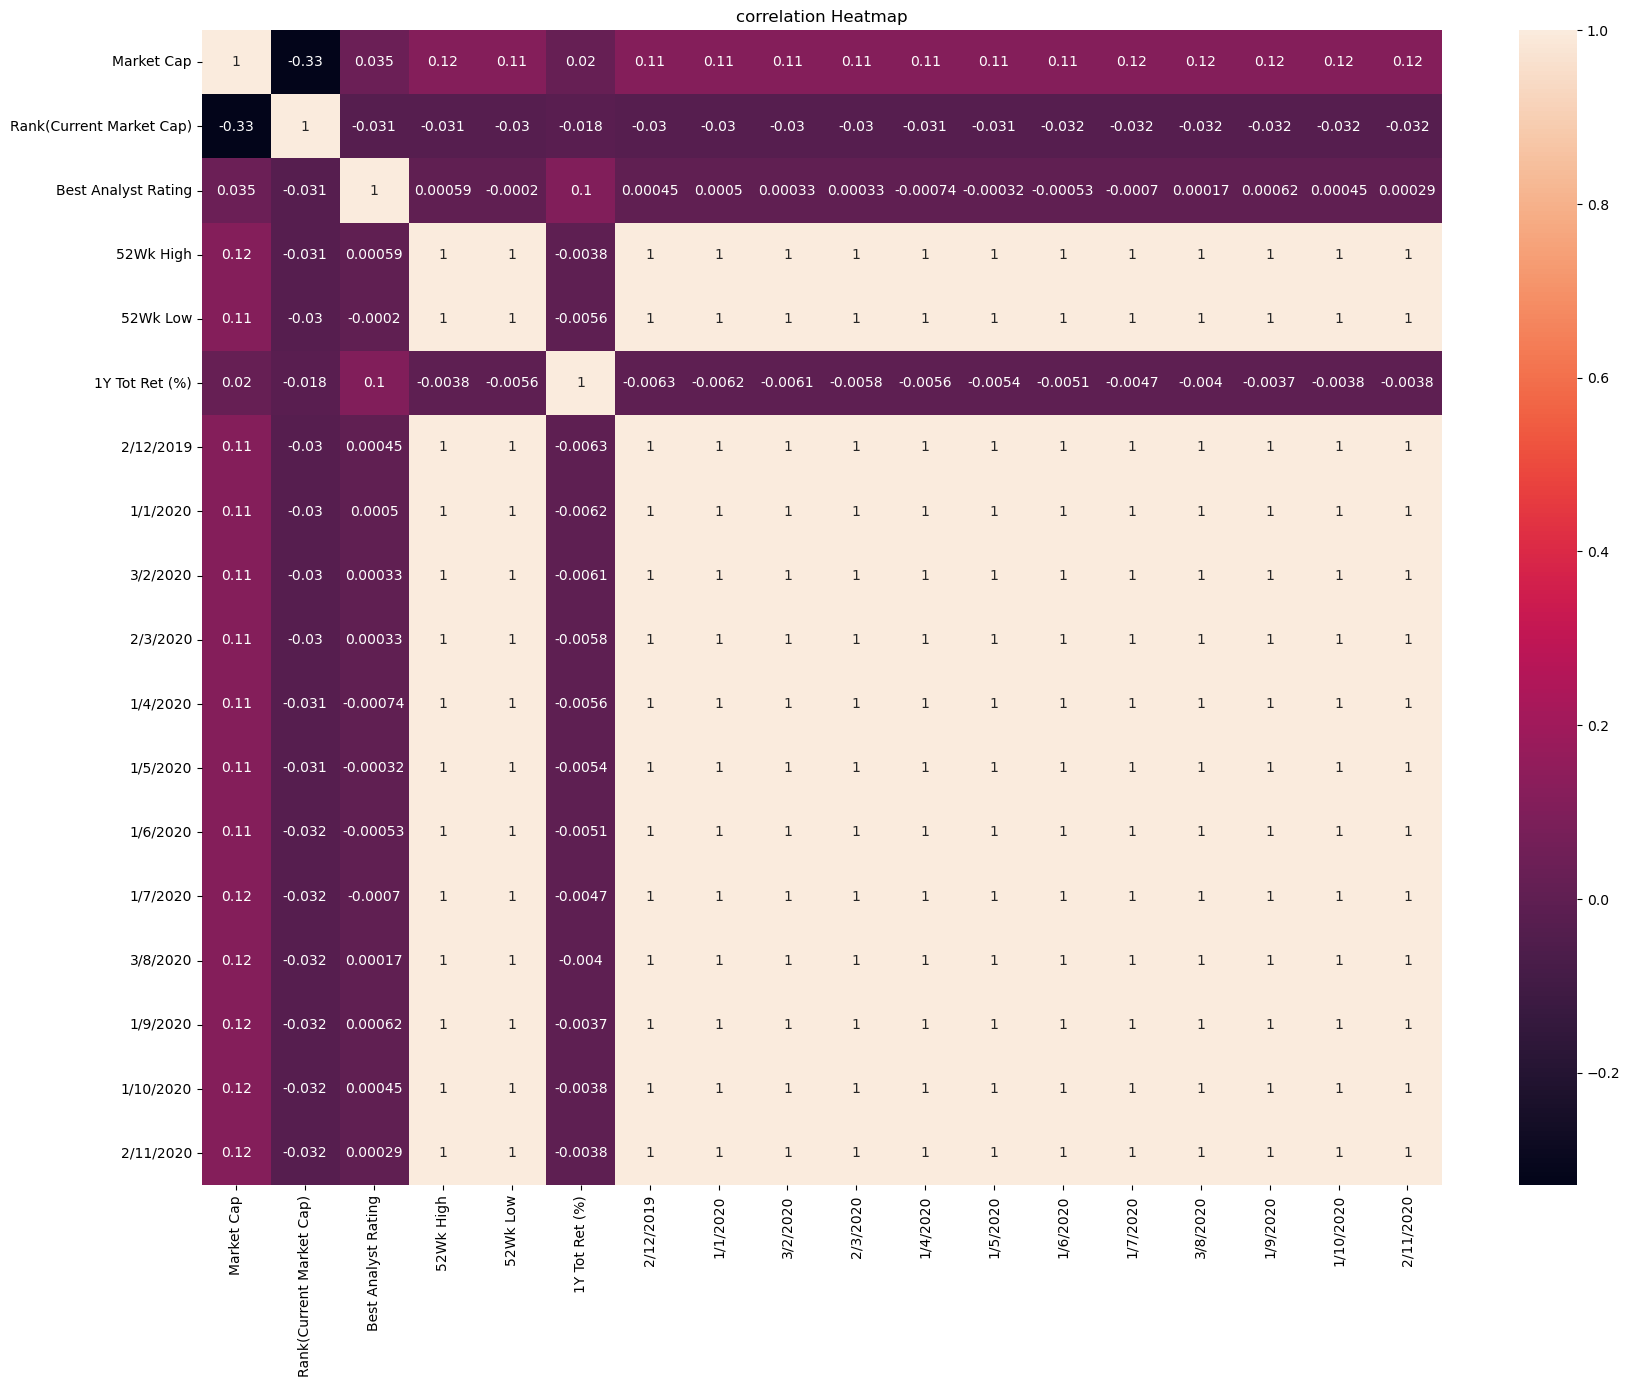

In [11]:
#creating correlation heatmap in seaborn
plt.figure(figsize=(20,15))
sns.heatmap(cor_matrix, annot=True)
plt.title('correlation Heatmap')
plt.show()


The results suggest that prices are likely to show correlation with other prices, which doesn't provide much valuable insight.
To gain more detail, it would be helpful to focus on specific variables or pairs of interest.

In [12]:
# creating a subset excluding share's prices
sub = df[['Market Cap', 'Best Analyst Rating', '52Wk High', '52Wk Low', '1Y Tot Ret (%)' ]]
sub

,Market Cap,Best Analyst Rating,52Wk High,52Wk Low,1Y Tot Ret (%)
0,2.045320e+12,4.116279,137.98,53.15,79.75
1,1.887800e+12,2.777778,10.32,7.18,0.00
2,1.642370e+12,4.789474,232.86,132.52,43.23
3,1.571010e+12,4.892857,3552.25,1626.03,77.83
4,1.202590e+12,4.772727,1816.89,1008.87,33.98
...,...,...,...,...,...
4932,2.757690e+09,0.000000,16.05,5.32,-37.81
4933,2.755676e+09,0.000000,35.45,20.34,7.36
4934,2.755527e+09,0.000000,27.18,22.52,4.05
4935,2.752932e+09,0.000000,50.50,45.68,2.99


In [13]:
#Creating a correlation matrix 
sub_corr= sub.corr()
sub_corr

,Market Cap,Best Analyst Rating,52Wk High,52Wk Low,1Y Tot Ret (%)
Market Cap,1.000000,0.035215,0.116678,0.114484,0.019853
Best Analyst Rating,0.035215,1.000000,0.000587,-0.000198,0.102906
52Wk High,0.116678,0.000587,1.000000,0.999791,-0.003761
52Wk Low,0.114484,-0.000198,0.999791,1.000000,-0.005561
1Y Tot Ret (%),0.019853,0.102906,-0.003761,-0.005561,1.000000


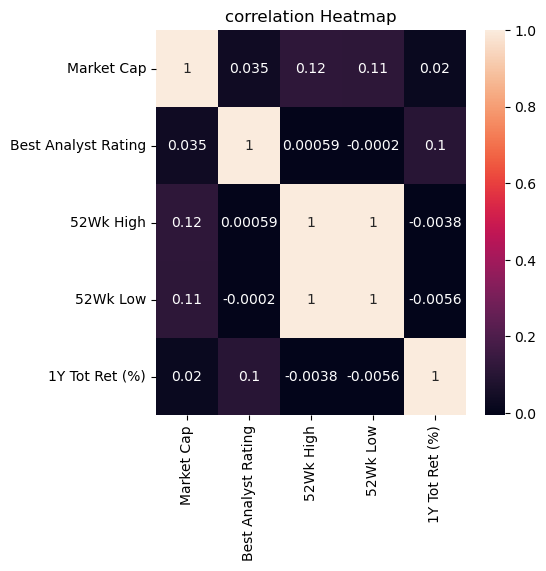

In [14]:
#creating correlation heatmap in seaborn
plt.figure(figsize=(5,5))
sns.heatmap(sub_corr, annot=True)
plt.title('correlation Heatmap')
plt.show()

There are no strong or moderate correlations between specific columns.  

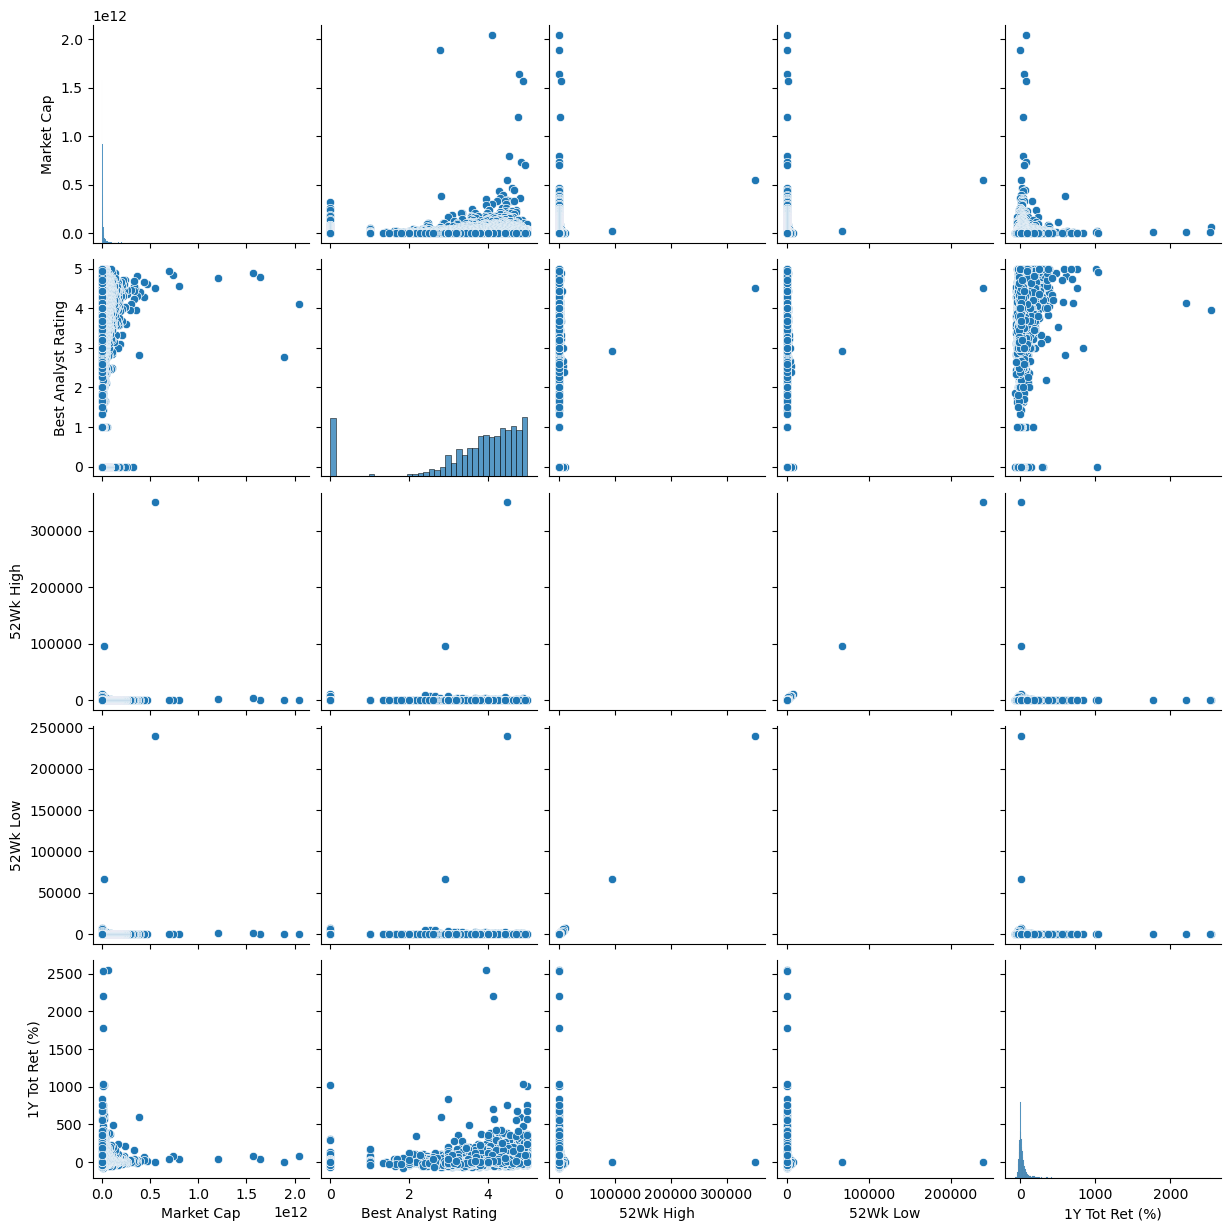

In [16]:
#creating a pair plot for selected variables
sns.pairplot(sub)

The distribution of "1Y Tot Ret" and "Market Capitalisation" could provide insights into whether larger companies provided better returns over the past year. If larger companies tend to have higher returns, it might indicate that they were safer or more lucrative investments.
Identifying and analyzing companies with exceptionally high market caps is essential. These companies, often referred to as 'blue-chip' companies. If their size correlates with performance, it can validate the belief in the stability and growth potential of such companies.

Let's look for any patterns in scatterplot.

C:\Temp\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


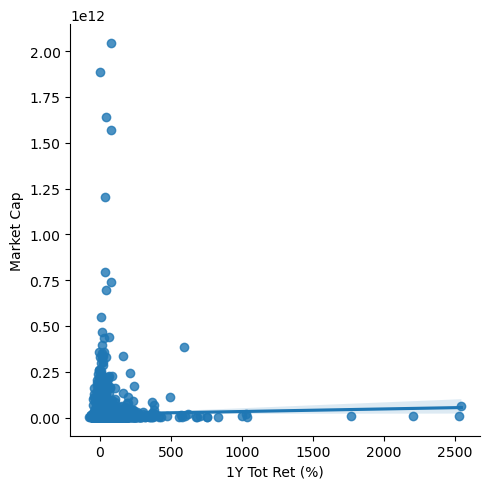

In [18]:
#Creating scatter plot for "Market cap" and "1Y Tot Ret (%)"
sns.lmplot(x='1Y Tot Ret (%)', y='Market Cap', data= df)
plt.show()

There is no significant correlation between market capitalization and firm’s performance. Therefore, in this instance, size did not matter. still we need to dig dipper into data to compare categories with the variables distribution.

Text(0, 0.5, 'Frequency')

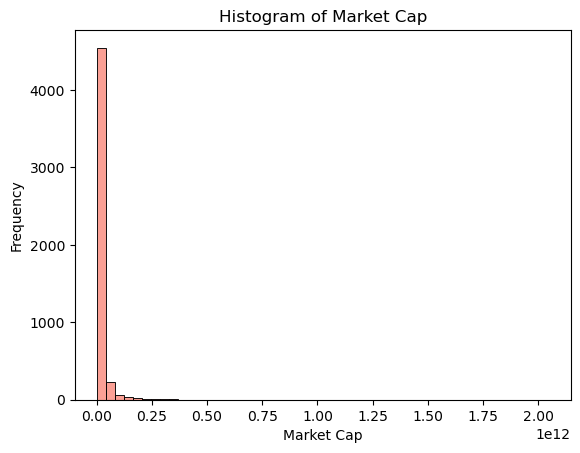

In [19]:
#creating histogram to visulaize the distribution of Market Cap
sns.histplot(df['Market Cap'], bins= 50, color='salmon')
plt.title('Histogram of Market Cap')
plt.ylabel('Frequency')

The distribution of 'Market Cap' is right-skewed, indicating that most companies have a lower market cap, with a few companies having exceptionally high market caps. 

In [20]:
df['Market Cap'].describe()

count    4.937000e+03
mean     1.912620e+10
std      6.586439e+10
min      2.751337e+09
25%      4.071396e+09
50%      6.752808e+09
75%      1.494602e+10
max      2.045320e+12
Name: Market Cap, dtype: float64

In [21]:
#Categorizing "Market Cap" 
df.loc[df['Market Cap'] < 4000000000 , 'Value category'] = 'Small Cap'

In [22]:
df.loc[(df['Market Cap'] >= 4000000000) & (df['Market Cap'] < 15000000000), 'Value category'] = 'Mid Cap'

In [23]:
df.loc[df['Market Cap'] > 2000000000, 'Value category'] = 'Large Cap'

In [24]:
df['Value category'].value_counts(dropna = False)

Value category
Large Cap    4937
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

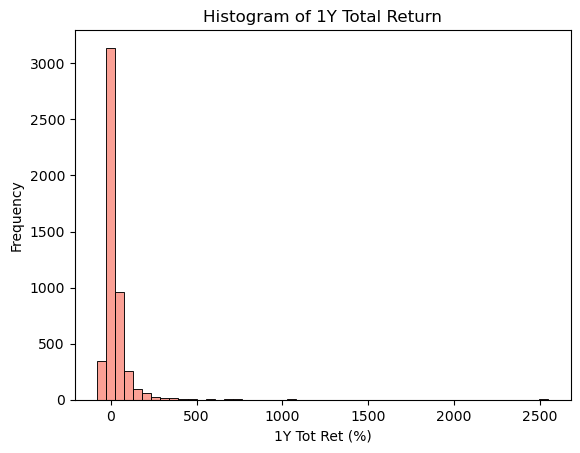

In [25]:
#creating histogram to visulaize the distribution of "1Y Tot Ret (%)"
sns.histplot(df['1Y Tot Ret (%)'], bins= 50, color='salmon')
plt.title('Histogram of 1Y Total Return')
plt.ylabel('Frequency')

This distribution provides insights into the performance of companies over the past year. While many companies had returns close to zero, there's a wide variability in performance, with exceptionally high positive returns and high negative returns.

In [26]:
df['1Y Tot Ret (%)'].describe()

count    4937.000000
mean       26.113857
std        93.391530
min       -77.790000
25%        -7.190000
50%         7.340000
75%        34.270000
max      2547.540000
Name: 1Y Tot Ret (%), dtype: float64

In [27]:
#Categorizing "1Y Tot Ret (%)"
df.loc[df['1Y Tot Ret (%)'] < -20 , 'performance category'] =  'extreme_negative_performance'

In [28]:
df.loc[(df['1Y Tot Ret (%)'] >= -20) & (df['1Y Tot Ret (%)'] < 0), 'performance category'] = 'moderate_negative_performance'

In [29]:
df.loc[(df['1Y Tot Ret (%)'] > 0) & (df['1Y Tot Ret (%)'] < 20), 'performance category'] = 'moderate_positive_performance'    

In [30]:
df.loc[(df['1Y Tot Ret (%)'] >= 20) & (df['1Y Tot Ret (%)'] < 100), 'performance category'] = 'high_positive_performance' 

In [31]:
df.loc[df['1Y Tot Ret (%)'] >= 100 , 'performance category'] =  'extreme_positive_performance'

In [32]:
df.loc[df['1Y Tot Ret (%)'] == 0, 'performance category'] =  'no data'

In [33]:
df['performance category'].value_counts(dropna = False)

performance category
high_positive_performance        1413
moderate_positive_performance    1270
moderate_negative_performance    1198
extreme_negative_performance      533
extreme_positive_performance      367
no data                           156
Name: count, dtype: int64

C:\Temp\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


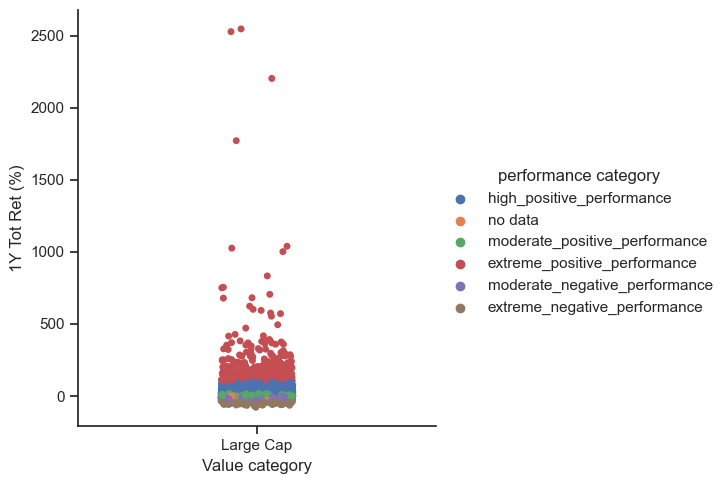

In [34]:
#Creating a cat plot
sns.set(style = 'ticks')
sns.catplot(x='Value category', y='1Y Tot Ret (%)' ,hue= 'performance category', data= df)

outliers and 'no data' category need to be removed to get the better visualization.

In [35]:
#creating a dataframe that excludes companies with '1Y Tot Ret (%)' equal to zero  
df_exc_no_data = df[(df['1Y Tot Ret (%)'] != 0)]

In [36]:
#finding Interquantile range to excludes outliers
from scipy.stats import iqr
iqr_value = iqr(df['1Y Tot Ret (%)'])
upper_bound = np.quantile(df['1Y Tot Ret (%)'], 0.75) + 1.5 * iqr_value
upper_bound

96.46000000000001

In [37]:
#creating a dataframe that excludes outliers
df_exc_no_data_outliers= df_exc_no_data[(df_exc_no_data['1Y Tot Ret (%)'] < 96.46)]

C:\Temp\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


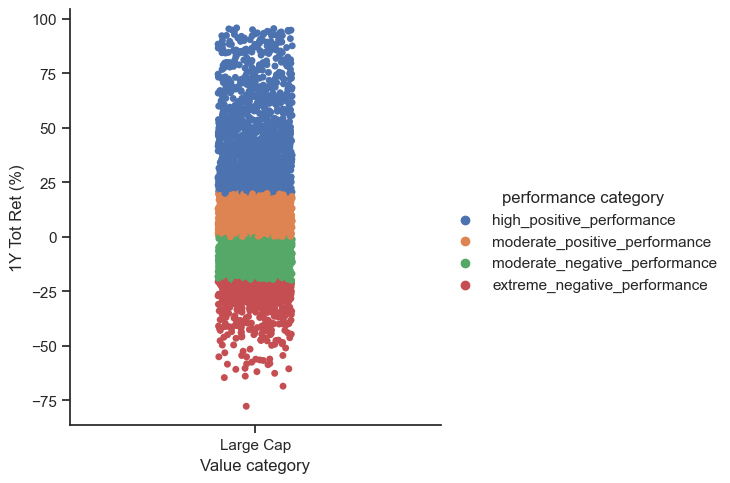

In [38]:
# recreating categorical plot
sns.set(style = 'ticks')
sns.catplot(x='Value category', y='1Y Tot Ret (%)' ,hue= 'performance category', data= df_exc_no_data_outliers)

The distribution of "1Y Tot Ret (%)" across various value categories is fairly consistent, indicating that market capitalization did not significantly influence performance. Also, It is interesting to see that number of companies performed 'high' midst of recession.

C:\Temp\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


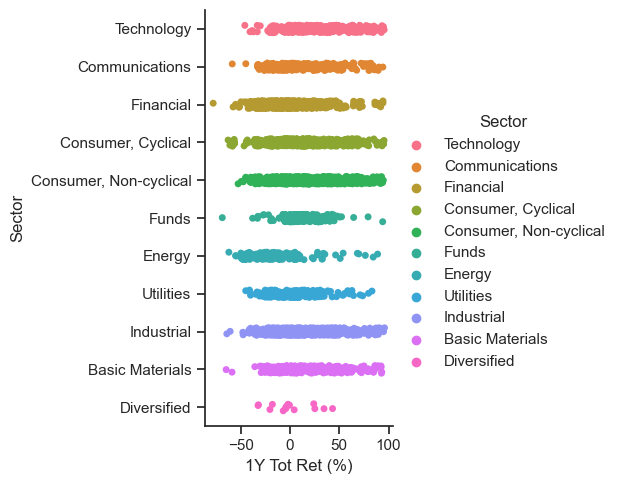

In [40]:
#Creating a categorical plot for distribution of "1Y Tot Ret" and "sector"
sns.set(style= 'ticks')
sns.catplot(x='1Y Tot Ret (%)', y='Sector', data= df_exc_no_data_outliers, hue= 'Sector')

From this visualiztion we can see how different sectors performed during the pandemic.
Some sectors such as Technology, Industrial and Basic material performed better compared to others like Energy, Funds, and Utilities. It is important to note that focusing on the Sector alone does not fully account for a company's performance and we need further exploration into indivual firm's performance.